<a href="https://colab.research.google.com/github/Utpal-Mishra/Python-Loan-Prediction/blob/main/AVHLoanPredictionCrossV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INSTALLING PACKAGES

In [ ]:
!pip install --upgrade keras
!pip install -q tensorflow==2.0beta1
!pip install catboost
!pip install 
!pip help install
!pip install imblearn

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)
     |████████████████████████████████| 87.9MB 64kB/s 
     |████████████████████████████████| 3.1MB 49.0MB/s 
     |████████████████████████████████| 501kB 52.8MB/s 
     |████████████████████████████████| 64.8MB 61kB/s 
ERROR: You must give at least one requirement to install (see "pip help install")

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

Description:
  Install packages from:
  
  - PyPI (and other indexes) using requirement specifiers.
  - VCS project urls.
  - Local project directories.
  - Local or remote source archives.
  
  pip also supports installing from "requirements files", which provide
  an easy way to specif

#IMPORTING

###LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
from matplotlib import cm as cm
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

import time
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dense, Activation, Flatten
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

###MOUNTING DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


###IMPORT TRAINING DATA

In [ ]:
path = "/content/drive/My Drive/LoanPrediction/train_ctrUa4K.csv"
train = pd.read_csv(path)
print(train.shape)
train.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


###IMPORT TESTING DATA

In [ ]:
path = "/content/drive/My Drive/LoanPrediction/test_lAUu6dG.csv"
test = pd.read_csv(path)
print(test.shape)
test.head()

(367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


#TRAINING DATA PRE-PROCESSING

In [ ]:
#train.columns
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

###VALUE_COUNTS of CATEGORICAL FEATURES

In [ ]:
print(train['Gender'].value_counts(), "\n")
print(train['Married'].value_counts(), "\n")
print(train['Dependents'].value_counts(), "\n")
print(train['Education'].value_counts(), "\n")
print(train['Self_Employed'].value_counts(), "\n")
print(train['Loan_Status'].value_counts(), "\n")
print(train['Property_Area'].value_counts(), "\n")

Male      489
Female    112
Name: Gender, dtype: int64 

Yes    398
No     213
Name: Married, dtype: int64 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

No     500
Yes     82
Name: Self_Employed, dtype: int64 

Y    422
N    192
Name: Loan_Status, dtype: int64 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 



###CATEGORIAL ENCODING

In [ ]:
#data['diagnosis'] = data['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')

train['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
train['Married'].replace(['No', 'Yes'], [0, 1], inplace=True)
train['Self_Employed'].replace(['Yes', 'No'], [1, 0], inplace=True)
train['Loan_Status'].replace(['N', 'Y'], [0, 1], inplace=True)
train['Dependents'].replace(['3+'], [3], inplace=True)
train['Education'].replace(['Graduate', 'Not Graduate'], [1, 0], inplace=True)
train['Property_Area'].replace(['Semiurban', 'Urban', 'Rural'], [0, 1, 2], inplace=True)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,1,1
1,LP001003,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1


###CHECKING VALUE_COUNTS of CATEGORICAL FEATURES

In [ ]:
print(train['Gender'].value_counts(), "\n")
print(train['Married'].value_counts(), "\n")
print(train['Dependents'].value_counts(), "\n")
print(train['Education'].value_counts(), "\n")
print(train['Self_Employed'].value_counts(), "\n")
print(train['Loan_Status'].value_counts(), "\n")
print(train['Property_Area'].value_counts(), "\n")

0.0    489
1.0    112
Name: Gender, dtype: int64 

1.0    398
0.0    213
Name: Married, dtype: int64 

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64 

1    480
0    134
Name: Education, dtype: int64 

0.0    500
1.0     82
Name: Self_Employed, dtype: int64 

1    422
0    192
Name: Loan_Status, dtype: int64 

0    233
1    202
2    179
Name: Property_Area, dtype: int64 



###CHECKING NULL VALUES

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
from fancyimpute import KNN  

In [ ]:
train['Gender'] = KNN(k=3).fit_transform(train[['Gender']])

Imputing row 1/614 with 0 missing, elapsed time: 0.036
Imputing row 101/614 with 0 missing, elapsed time: 0.036
Imputing row 201/614 with 0 missing, elapsed time: 0.037
Imputing row 301/614 with 0 missing, elapsed time: 0.037
Imputing row 401/614 with 0 missing, elapsed time: 0.037
Imputing row 501/614 with 0 missing, elapsed time: 0.038
Imputing row 601/614 with 0 missing, elapsed time: 0.038
[KNN] Warning: 13/614 still missing after imputation, replacing with 0


In [ ]:
train.fillna('0')
train['Gender'].isnull().sum()

0

In [ ]:
train['Married'] = KNN(k=3).fit_transform(train[['Married']])

Imputing row 1/614 with 0 missing, elapsed time: 0.036
Imputing row 101/614 with 0 missing, elapsed time: 0.036
Imputing row 201/614 with 0 missing, elapsed time: 0.037
Imputing row 301/614 with 0 missing, elapsed time: 0.037
Imputing row 401/614 with 0 missing, elapsed time: 0.037
Imputing row 501/614 with 0 missing, elapsed time: 0.037
Imputing row 601/614 with 0 missing, elapsed time: 0.038
[KNN] Warning: 3/614 still missing after imputation, replacing with 0


In [ ]:
train.fillna('0')
train['Married'].isnull().sum()

0

In [ ]:
train['Dependents'] = KNN(k=3).fit_transform(train[['Dependents']])

Imputing row 1/614 with 0 missing, elapsed time: 0.039
Imputing row 101/614 with 0 missing, elapsed time: 0.040
Imputing row 201/614 with 0 missing, elapsed time: 0.040
Imputing row 301/614 with 0 missing, elapsed time: 0.040
Imputing row 401/614 with 0 missing, elapsed time: 0.041
Imputing row 501/614 with 0 missing, elapsed time: 0.041
Imputing row 601/614 with 0 missing, elapsed time: 0.041
[KNN] Warning: 15/614 still missing after imputation, replacing with 0


In [ ]:
train.fillna('0')
train['Dependents'].isnull().sum()

0

In [ ]:
train['Self_Employed'] = KNN(k=3).fit_transform(train[['Self_Employed']])

Imputing row 1/614 with 0 missing, elapsed time: 0.033
Imputing row 101/614 with 0 missing, elapsed time: 0.033
Imputing row 201/614 with 0 missing, elapsed time: 0.034
Imputing row 301/614 with 0 missing, elapsed time: 0.034
Imputing row 401/614 with 0 missing, elapsed time: 0.034
Imputing row 501/614 with 0 missing, elapsed time: 0.035
Imputing row 601/614 with 1 missing, elapsed time: 0.035
[KNN] Warning: 32/614 still missing after imputation, replacing with 0


In [ ]:
train.fillna('0')
train['Self_Employed'].isnull().sum()

0

In [ ]:
train['LoanAmount'] = KNN(k=3).fit_transform(train[['LoanAmount']])

Imputing row 1/614 with 1 missing, elapsed time: 0.047
Imputing row 101/614 with 0 missing, elapsed time: 0.048
Imputing row 201/614 with 0 missing, elapsed time: 0.048
Imputing row 301/614 with 0 missing, elapsed time: 0.049
Imputing row 401/614 with 0 missing, elapsed time: 0.049
Imputing row 501/614 with 0 missing, elapsed time: 0.049
Imputing row 601/614 with 0 missing, elapsed time: 0.049
[KNN] Warning: 22/614 still missing after imputation, replacing with 0


In [ ]:
train.fillna('0')
train['LoanAmount'].isnull().sum()

0

In [ ]:
train['Loan_Amount_Term'] = KNN(k=3).fit_transform(train[['Loan_Amount_Term']])

Imputing row 1/614 with 0 missing, elapsed time: 0.034
Imputing row 101/614 with 0 missing, elapsed time: 0.034
Imputing row 201/614 with 0 missing, elapsed time: 0.034
Imputing row 301/614 with 0 missing, elapsed time: 0.035
Imputing row 401/614 with 0 missing, elapsed time: 0.035
Imputing row 501/614 with 0 missing, elapsed time: 0.035
Imputing row 601/614 with 0 missing, elapsed time: 0.036
[KNN] Warning: 14/614 still missing after imputation, replacing with 0


In [ ]:
train.fillna('0')
train['Loan_Amount_Term'].isnull().sum()

0

In [ ]:
train['Credit_History'] = KNN(k=3).fit_transform(train[['Credit_History']])

Imputing row 1/614 with 0 missing, elapsed time: 0.035
Imputing row 101/614 with 0 missing, elapsed time: 0.035
Imputing row 201/614 with 0 missing, elapsed time: 0.036
Imputing row 301/614 with 0 missing, elapsed time: 0.036
Imputing row 401/614 with 0 missing, elapsed time: 0.036
Imputing row 501/614 with 0 missing, elapsed time: 0.037
Imputing row 601/614 with 1 missing, elapsed time: 0.037
[KNN] Warning: 50/614 still missing after imputation, replacing with 0


In [ ]:
train.fillna('0')
train['Credit_History'].isnull().sum()

0

In [ ]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#TESTING DATA PRE-PROCESSING

In [ ]:
#test.columns
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

###VALUE_COUNTS of CATEGORICAL FEATURES

In [ ]:
print(test['Gender'].value_counts(), "\n")
print(test['Married'].value_counts(), "\n")
print(test['Dependents'].value_counts(), "\n")
print(test['Education'].value_counts(), "\n")
print(test['Self_Employed'].value_counts(), "\n")
#print(test['Loan_Status'].value_counts(), "\n")
print(test['Property_Area'].value_counts(), "\n")

Male      286
Female     70
Name: Gender, dtype: int64 

Yes    233
No     134
Name: Married, dtype: int64 

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64 

Graduate        283
Not Graduate     84
Name: Education, dtype: int64 

No     307
Yes     37
Name: Self_Employed, dtype: int64 

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64 



###CATEGORIAL ENCODING

In [ ]:
#data['diagnosis'] = data['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')

test['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
test['Married'].replace(['No', 'Yes'], [0, 1], inplace=True)
test['Self_Employed'].replace(['Yes', 'No'], [1, 0], inplace=True)#
#test['Loan_Status'].replace(['N', 'Y'], [0, 1], inplace=True)
test['Dependents'].replace(['3+'], [3], inplace=True)
test['Education'].replace(['Graduate', 'Not Graduate'], [1, 0], inplace=True)
test['Property_Area'].replace(['Semiurban', 'Urban', 'Rural'], [0, 1, 2], inplace=True)
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0.0,1,0,1,0.0,5720,0,110.0,360.0,1.0,1
1,LP001022,0.0,1,1,1,0.0,3076,1500,126.0,360.0,1.0,1
2,LP001031,0.0,1,2,1,0.0,5000,1800,208.0,360.0,1.0,1
3,LP001035,0.0,1,2,1,0.0,2340,2546,100.0,360.0,NaN,1
4,LP001051,0.0,0,0,0,0.0,3276,0,78.0,360.0,1.0,1


###CHECKING VALUE_COUNTS of CATEGORICAL FEATURES

In [ ]:
print(test['Gender'].value_counts(), "\n")
print(test['Married'].value_counts(), "\n")
print(test['Dependents'].value_counts(), "\n")
print(test['Education'].value_counts(), "\n")
print(test['Self_Employed'].value_counts(), "\n")
#print(test['Loan_Status'].value_counts(), "\n")
print(test['Property_Area'].value_counts(), "\n")

0.0    286
1.0     70
Name: Gender, dtype: int64 

1    233
0    134
Name: Married, dtype: int64 

0    200
2     59
1     58
3     40
Name: Dependents, dtype: int64 

1    283
0     84
Name: Education, dtype: int64 

0.0    307
1.0     37
Name: Self_Employed, dtype: int64 

1    140
0    116
2    111
Name: Property_Area, dtype: int64 



###CHECKING NULL VALUES

In [ ]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
from fancyimpute import KNN  

In [ ]:
test['Gender'] = KNN(k=3).fit_transform(test[['Gender']])

Imputing row 1/367 with 0 missing, elapsed time: 0.021
Imputing row 101/367 with 0 missing, elapsed time: 0.021
Imputing row 201/367 with 0 missing, elapsed time: 0.022
Imputing row 301/367 with 0 missing, elapsed time: 0.022
[KNN] Warning: 11/367 still missing after imputation, replacing with 0


In [ ]:
test.fillna('0')
test['Gender'].isnull().sum()

0

In [ ]:
test['Married'] = KNN(k=3).fit_transform(test[['Married']])

Imputing row 1/367 with 0 missing, elapsed time: 0.022
Imputing row 101/367 with 0 missing, elapsed time: 0.022
Imputing row 201/367 with 0 missing, elapsed time: 0.022
Imputing row 301/367 with 0 missing, elapsed time: 0.023


/usr/local/lib/python3.6/dist-packages/fancyimpute/solver.py:58: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


In [ ]:
test.fillna('0')
test['Married'].isnull().sum()

0

In [ ]:
test['Dependents'] = KNN(k=3).fit_transform(test[['Dependents']])

Imputing row 1/367 with 0 missing, elapsed time: 0.017
Imputing row 101/367 with 0 missing, elapsed time: 0.018
Imputing row 201/367 with 0 missing, elapsed time: 0.018
Imputing row 301/367 with 0 missing, elapsed time: 0.018
[KNN] Warning: 10/367 still missing after imputation, replacing with 0


In [ ]:
test.fillna('0')
test['Dependents'].isnull().sum()

0

In [ ]:
test['Self_Employed'] = KNN(k=3).fit_transform(test[['Self_Employed']])

Imputing row 1/367 with 0 missing, elapsed time: 0.017
Imputing row 101/367 with 0 missing, elapsed time: 0.018
Imputing row 201/367 with 0 missing, elapsed time: 0.018
Imputing row 301/367 with 0 missing, elapsed time: 0.018
[KNN] Warning: 23/367 still missing after imputation, replacing with 0


In [ ]:
test.fillna('0')
test['Self_Employed'].isnull().sum()

0

In [ ]:
test['LoanAmount'] = KNN(k=3).fit_transform(test[['LoanAmount']])

Imputing row 1/367 with 0 missing, elapsed time: 0.025
Imputing row 101/367 with 0 missing, elapsed time: 0.025
Imputing row 201/367 with 0 missing, elapsed time: 0.025
Imputing row 301/367 with 0 missing, elapsed time: 0.026
[KNN] Warning: 5/367 still missing after imputation, replacing with 0


In [ ]:
test.fillna('0')
test['LoanAmount'].isnull().sum()

0

In [ ]:
test['Loan_Amount_Term'] = KNN(k=3).fit_transform(test[['Loan_Amount_Term']])

Imputing row 1/367 with 0 missing, elapsed time: 0.027
Imputing row 101/367 with 0 missing, elapsed time: 0.028
Imputing row 201/367 with 0 missing, elapsed time: 0.028
Imputing row 301/367 with 0 missing, elapsed time: 0.029
[KNN] Warning: 6/367 still missing after imputation, replacing with 0


In [ ]:
test.fillna('0')
test['Loan_Amount_Term'].isnull().sum()

0

In [ ]:
test['Credit_History'] = KNN(k=3).fit_transform(test[['Credit_History']])

Imputing row 1/367 with 0 missing, elapsed time: 0.022
Imputing row 101/367 with 0 missing, elapsed time: 0.023
Imputing row 201/367 with 0 missing, elapsed time: 0.023
Imputing row 301/367 with 0 missing, elapsed time: 0.023
[KNN] Warning: 29/367 still missing after imputation, replacing with 0


In [ ]:
test.fillna('0')
test['Credit_History'].isnull().sum()

0

In [ ]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#DATA SPLITTING

TRAINING AND VALIDATION DATA

In [ ]:
print(train['Loan_Status'].value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64


In [ ]:
train = train.set_index('Loan_ID')
test = test.set_index('Loan_ID')
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,0.0,0.0,0.0,1,0.0,5849,0.0,0.0,360.0,1.0,1,1
LP001003,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,2,0
LP001005,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
LP001006,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
LP001008,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1


In [ ]:
Y = train['Loan_Status'].values
X = train.drop('Loan_Status', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

In [ ]:
print("X_train.shape: ",X_train.shape, "X_test.shape: ",X_test.shape,"Y_train.shape: ", Y_train.shape, "Y_test.shape: ",Y_test.shape)

X_train.shape:  (491, 11) X_test.shape:  (123, 11) Y_train.shape:  (491,) Y_test.shape:  (123,)


In [ ]:
import statsmodels.api as sm
X_Opt = np.append(arr = np.ones((X_train.shape[0], 1)), values = X_train, axis = 1)
regressor_OLS = sm.OLS(Y_train, X_Opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     12.98
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           1.08e-21
Time:                        21:48:53   Log-Likelihood:                -255.61
No. Observations:                 491   AIC:                             535.2
Df Residuals:                     479   BIC:                             585.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2324      0.100      2.323      0.0

In [ ]:
smt = SMOTE()
X_train, Y_train = smt.fit_sample(X_train, Y_train)
print(np.bincount(Y_train))

[337 337]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


TESTING DATA

In [ ]:
XTest = test
XTest.shape

(367, 11)

In [ ]:
import statsmodels.api as sm
X_Opt = np.append(arr = np.ones((X_test.shape[0], 1)), values = X_test, axis = 1)
regressor_OLS = sm.OLS(Y_test, X_Opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     3.029
Date:                Tue, 09 Jun 2020   Prob (F-statistic):            0.00143
Time:                        21:48:59   Log-Likelihood:                -63.424
No. Observations:                 123   AIC:                             150.8
Df Residuals:                     111   BIC:                             184.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8675      0.240      3.615      0.0

#MODELLING

###ENSEMBLE MODELLING USING CROSS VALIDATION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
# prepare the model
"""with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)"""
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)

parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
#clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)
#clf.fit(trainX, trainY)

models_list = []
models_list.append(('KNN', KNeighborsClassifier()))
models_list.append(('NB', GaussianNB()))
models_list.append(('DT', DecisionTreeClassifier(criterion='entropy')))
models_list.append(('BAG', BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)))
models_list.append(('ET', ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2)))
models_list.append(('RF', RandomForestClassifier(criterion='entropy')))
models_list.append(('LogR', LogisticRegression(max_iter=100)))
models_list.append(('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)))
models_list.append(('XGB', XGBClassifier(n_estimators=1000, learning_rate=0.01, gamma=5, subsample=0.5)))
models_list.append(('ADB', AdaBoostClassifier()))
models_list.append(('Grid', GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)))
#models_list.append(('CATB', CatBoostClassifier()))

ACCURACY = {}
EVALUATION = {}

In [ ]:
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = StratifiedKFold(n_splits=num_folds, shuffle = True)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

KNN: 0.761106 (0.050470) (run time: 0.054582)
NB: 0.680992 (0.036939) (run time: 0.012606)
DT: 0.774627 (0.051061) (run time: 0.046458)
BAG: 0.786414 (0.038305) (run time: 0.190422)
ET: 0.799451 (0.047188) (run time: 0.151357)
RF: 0.820566 (0.048283) (run time: 2.120676)
LogR: 0.724188 (0.045071) (run time: 0.072285)
GB: 0.808648 (0.049770) (run time: 0.708125)
XGB: 0.805597 (0.037572) (run time: 4.710002)
ADB: 0.804017 (0.043443) (run time: 0.922682)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

PIPELINING

In [ ]:
# Standardize the dataset
pipelines = []

pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('LinearSVC', LinearSVC())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeClassifier(criterion='entropy'))])))
pipelines.append(('ScaledBAG', Pipeline([('Scaler', StandardScaler()),('BAG', BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5))])))
pipelines.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2))])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(criterion='entropy'))])))
pipelines.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()),('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1))])))
pipelines.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('GB', XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75))])))
pipelines.append(('ScaledADB', Pipeline([('Scaler', StandardScaler()),('ADB', AdaBoostClassifier())])))
#pipelines.append(('ScaledCATB', Pipeline([('Scaler', StandardScaler()),('CATB', CatBoostClassifier())])))

results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = StratifiedKFold(n_splits=num_folds, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledKNN: 0.770193 (0.067634) (run time: 0.065038)
ScaledSVC: 0.788169 (0.056035) (run time: 0.174437)
ScaledNB: 0.721313 (0.061699) (run time: 0.411410)
ScaledNB: 0.683999 (0.040926) (run time: 0.022594)
ScaledDT: 0.761765 (0.097120) (run time: 0.053809)
ScaledBAG: 0.797278 (0.093751) (run time: 0.202593)
ScaledET: 0.801888 (0.102029) (run time: 0.170972)
ScaledRF: 0.825637 (0.103570) (run time: 2.140813)
ScaledGB: 0.803600 (0.134115) (run time: 0.695776)
ScaledXGB: 0.799078 (0.129744) (run time: 0.540302)
ScaledADB: 0.790145 (0.118352) (run time: 0.942349)


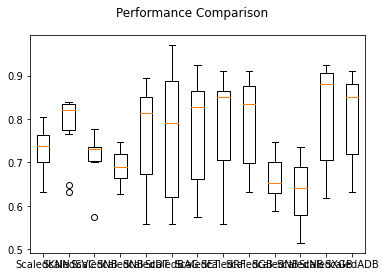

In [ ]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#EVALUATION

In [ ]:
EVALUATION = pd.DataFrame(EVALUATION)
EVALUATION

In [ ]:
EVALUATION.astype('int64').dtypes
EVALUATION.replace([0, 1], ['N', 'Y'], inplace = True)

In [ ]:
#for i in range(0, len(EVALUATION.columns)):
#  print(test.reset_index('Loan_ID')['Loan_ID'], EVALUATION[EVALUATION.columns[i]])

In [ ]:
#for i in range(0, len(EVALUATION.columns)):
#  pd.concat([pd.concat([test.reset_index('Loan_ID')['Loan_ID'], EVALUATION[EVALUATION.columns[i]]], axis = 1)], axis=1)
  #pd.concat([pd.concat([test.reset_index('Loan_ID')['Loan_ID'], EVALUATION[EVALUATION.columns[i]]], axis = 1)], axis=1).to_csv(str('LP' + str(i) + '.csv'), header=False, index=False) 
#  pd.concat([pd.concat([test.reset_index('Loan_ID')['Loan_ID'], EVALUATION[EVALUATION.columns[i]]], axis = 1)], axis=1).to_csv('drive/My Drive/AnalyticsVidyaHackathon/LoanPrediction/'+str(EVALUATION.columns[i] + '.csv'))